In [ ]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


1. Загрузка данных (и очистка)

In [ ]:
gt = pd.read_csv('/content/drive/My Drive/ter.csv', encoding='UTF-8')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,76,79,90,92,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
gt=gt[gt['iday']!=0] #del rows with day=0 and month=0
gt=gt[gt['imonth']!=0]

2. Преобразование датасета

In [ ]:
gt2 = gt[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'latitude', 'longitude']]

In [ ]:
gt2['iday']=gt2['iday'].astype(str)
gt2['imonth']=gt2['imonth'].astype(str)
gt2['iyear']=gt2['iyear'].astype(str)
gt2['accident_date'] = gt2[['iyear', 'imonth', 'iday']].apply('-'.join, axis=1).apply(pd.to_datetime)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
gt2

,iyear,imonth,iday,country_txt,region_txt,latitude,longitude,accident_date
0,1970,7,2,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,1970-07-02
5,1970,1,1,United States,North America,37.005105,-89.176269,1970-01-01
6,1970,1,2,Uruguay,South America,-34.891151,-56.187214,1970-01-02
7,1970,1,2,United States,North America,37.791927,-122.225906,1970-01-02
8,1970,1,2,United States,North America,43.076592,-89.412488,1970-01-02
...,...,...,...,...,...,...,...,...
65530,1997,6,5,Algeria,Middle East & North Africa,34.666667,3.250000,1997-06-05
65531,1997,6,5,Hungary,Eastern Europe,47.498406,19.040758,1997-06-05
65532,1997,6,5,Hungary,Eastern Europe,47.498406,19.040758,1997-06-05
65533,1997,6,5,Hungary,Eastern Europe,47.498406,19.040758,1997-06-05


3. Сортировка

In [ ]:
gt2 = gt2.sort_values(['country_txt', 'region_txt', 'iyear', 'imonth', 'iday', 'latitude', 'longitude'])

4. Количественный анализ

In [ ]:
gt3=gt2['country_txt'].value_counts().sort_values(ascending=False)

In [ ]:
gt3

Peru                5950
Colombia            5517
El Salvador         5275
United Kingdom      3975
India               2736
                    ... 
Andorra                1
Falkland Islands       1
Belarus                1
Maldives               1
North Korea            1
Name: country_txt, Length: 192, dtype: int64

5,6.Стат анализ, квартили

In [ ]:
kv=gt3.quantile([.25, .5, .75,1])

In [ ]:
kv

0.25       7.00
0.50      32.00
0.75     130.75
1.00    5950.00
Name: country_txt, dtype: float64

In [ ]:
t = gt3[ (kv.loc[0.75] > gt3) & (kv.loc[0.25] <gt3)]

In [ ]:
gt6 = gt2.query('country_txt in (@t.index)')

In [ ]:
gt6

,iyear,imonth,iday,country_txt,region_txt,latitude,longitude,accident_date
1863,1973,5,1,Afghanistan,South Asia,34.516895,69.147011,1973-05-01
7627,1979,2,14,Afghanistan,South Asia,34.516895,69.147011,1979-02-14
9156,1979,8,27,Afghanistan,South Asia,33.542622,68.415329,1979-08-27
9218,1979,9,9,Afghanistan,South Asia,34.346722,62.197315,1979-09-09
31132,1987,5,31,Afghanistan,South Asia,NaN,NaN,1987-05-31
...,...,...,...,...,...,...,...,...
47322,1991,7,20,Zimbabwe,Sub-Saharan Africa,-17.825166,31.033510,1991-07-20
51604,1992,5,25,Zimbabwe,Sub-Saharan Africa,-20.120995,28.627290,1992-05-25
56630,1994,6,19,Zimbabwe,Sub-Saharan Africa,-18.019782,31.067907,1994-06-19
60659,1995,10,14,Zimbabwe,Sub-Saharan Africa,-17.825166,31.033510,1995-10-14


7. Кол.анализ по месяцу

In [ ]:
gt7=gt6['imonth'].value_counts().sort_values(ascending=False)

In [ ]:
gt71=gt7.rename_axis('month').reset_index()

In [ ]:
gt71.rename(columns={'imonth': 'count','month':'imonth'}, inplace = True)

In [ ]:
gt71

,imonth,count
0,5,416
1,3,409
2,4,406
3,7,381
4,2,357
5,1,354
6,10,350
7,9,339
8,11,337
9,12,315


8.Нормализация

In [ ]:
gt71['imonth']=gt71['imonth'].astype(int)
gt71['count']=gt71['count'].astype(int)

In [ ]:
gt71['imonth']= (gt71['imonth']-gt71['imonth'].min())/(gt71['imonth'].max()-gt71['imonth'].min())

In [ ]:
gt71['count']= (gt71['count']-gt71['count'].min())/(gt71['count'].max()-gt71['count'].min())

9.Гистограммы и кривые распределения

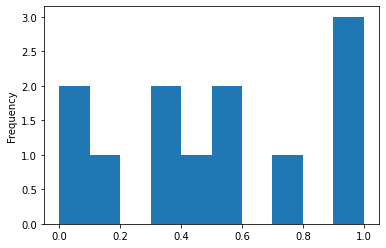

In [ ]:
gt71['count'].plot(kind='hist')

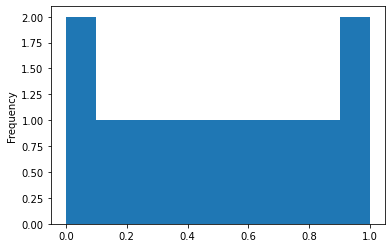

In [ ]:
gt71['imonth'].plot(kind='hist')

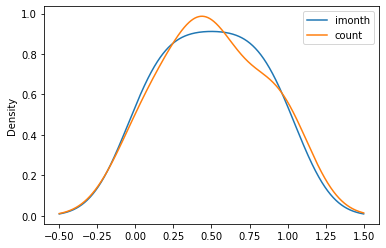

In [ ]:
gt71.plot(kind='kde') #А нормальное распределение с какими параметрами??

10. Лин.регр

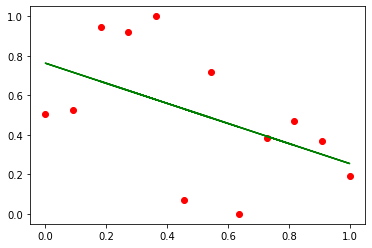

In [ ]:
model=linear_model.LinearRegression()
model.fit(gt71['imonth'].values.reshape(-1,1),gt71['count'])
pred=model.predict(gt71['imonth'].values.reshape(-1,1))
plt.plot(gt71['imonth'],pred,c='green')
plt.scatter(gt71['imonth'],gt71['count'],c='red')
plt.show()